# El problema

El problema consiste en predecir cuántas ataques se van a realizar en el futuro. 
Para ello utilizaremos el Dataset del proceso KDD ya analizados donde aparecen el número de ataques terroristas, el numero de muertos y fallecidos, además de variables como el desempleo o la poblacion, incluida la localizacion de los atentados.

Se usará análisis de regresión con el fin de  capturar la relación entre características y 
número de fallecidos.

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [2]:
# machine learning 
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle

# Carga de Datos

En el fichero excell, como se ha mencionado, están incluidas ya las variables una vez refundidos los Datasets y realizados el proceso KDD.

In [3]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_ya_KDD.xlsx") 

In [4]:
data_1="Terrorismo_ya_KDD"

In [5]:
data_1  = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

In [6]:
frames = [data_1]
Terrorismo = pd.concat(frames)
Terrorismo=Terrorismo.drop_duplicates()
Terrorismo

,Country,City,Latitude,Longitude,Multiple,Success,Attacktype,Target_type,Group,Weapon_type,Nkill,Nwound,unemployed,Population
Year,,,,,,,,,,,,,,
2000,Kosovo,Peje,42.659809,20.307119,0,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives,0,1,NaN,NaN
2000,Kosovo,Gorazhdec,42.640556,20.369722,0,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,0,0,NaN,NaN
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1401.967,46562483.0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1504.993,46562483.0
2000,Spain,Galdacano,43.230556,-2.845833,0,1,Armed Assault,Military,Unknown,Incendiary,0,1,1697.113,46562483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1540.765,83129285.0
2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1363.770,83129285.0
2020,Germany,Leipzig,51.342239,12.374772,0,1,Facility/Infrastructure Attack,Military,Left-wing extremists,Incendiary,0,0,1266.974,83129285.0


In [7]:
Terrorismo.shape

(414638, 14)

In [8]:
Terrorismo.describe()

,Latitude,Longitude,Multiple,Success,Nkill,Nwound,unemployed,Population
count,414638.000000,414638.000000,414638.000000,414638.000000,414638.000000,414638.000000,412656.000000,4.126560e+05
mean,48.209727,4.590996,0.173624,0.775211,0.348087,2.026476,1396.742902,4.823145e+07
std,6.523962,10.963521,0.378786,0.417444,3.590343,21.226690,832.046010,2.585161e+07
min,-22.336000,-21.895210,0.000000,0.000000,0.000000,0.000000,5.751000,3.180440e+05
25%,42.636510,-5.955833,0.000000,1.000000,0.000000,0.000000,284.221000,1.112134e+07
50%,50.557887,2.148641,0.000000,1.000000,0.000000,0.000000,1732.593000,6.328514e+07
75%,54.446968,11.974560,0.000000,1.000000,0.000000,0.000000,2094.850000,6.643555e+07
max,67.143672,166.912000,1.000000,1.000000,344.000000,727.000000,2565.168000,8.316087e+07


# Exploración

Vamos a explorar con estadística básica nuestro conjunto de datos para ver si podemos sacar alguna conclusión

In [9]:
#0.2 Explore Data
# charts from https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
import matplotlib.pyplot as plt
plt.rcdefaults()

Los histogramas agrupan los datos en ubicaciones  y proporcionan un recuento de los 
número de observaciones en cada caso. 
Sirven para identificar la distribución de los datos, y es posible que nos permita también identificación valores atípicos. 

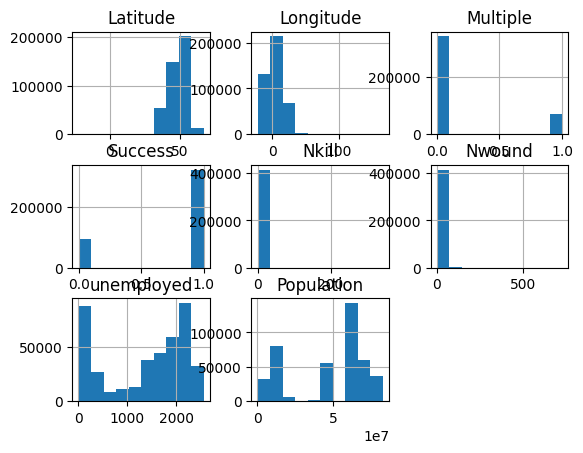

In [10]:
#0.2.1 Univariate Histograms
# 
Terrorismo.hist()
plt.show()

Los diagramas de densidad son otra forma de tener una idea rápida de la distribución de cada atributo. Los diagrams parecen *histogramas abstractos* que mediante una curva suve dibujan la distribución de los datos.

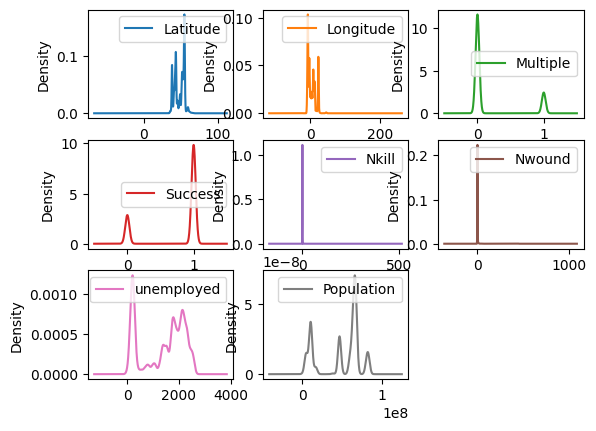

In [11]:
#0.2.2 Density Plots
Terrorismo.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()


Un gráfico de dispersión (ScatterPlot) muestra la relación entre dos 
variables como puntos en dos  dimensiones, un eje por cada atributo
Las gráficas de dispersión son útiles para detección de relaciones estructuradas 
entre variables

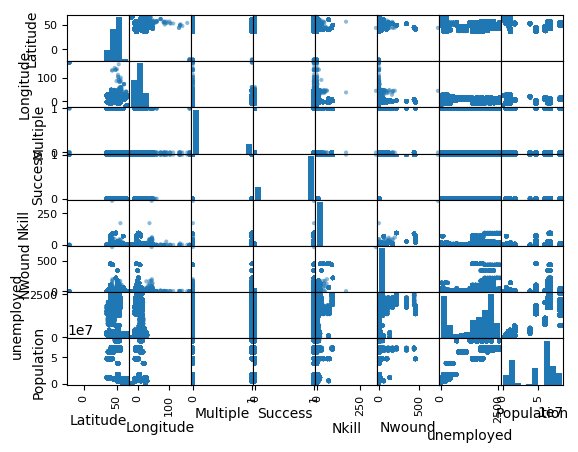

In [12]:
#0.2.3 Scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(Terrorismo)
plt.show()

Los diagramas de correlación nos indicarán cuan correlacionadas están los atributos predictores con el valor a predecir

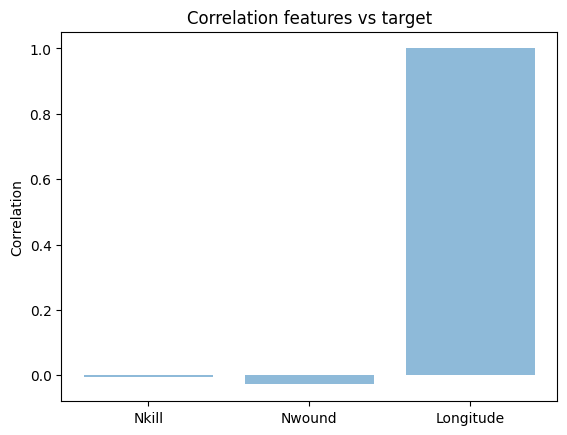

[-0.004892036855941204, -0.028015365324627103, 1.0]

In [30]:
import numpy as np
from scipy.stats.stats import pearsonr 
corr = [pearsonr(Terrorismo['Nkill'], Terrorismo['Longitude'])[0], pearsonr(Terrorismo['Nwound'], Terrorismo['Longitude'])[0], 
        pearsonr(Terrorismo['Longitude'], Terrorismo['Longitude'])[0]]

 
features= ('Nkill', 'Nwound', 'Longitude')
y_pos = np.arange(len(features))
 
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Correlation')
plt.title('Correlation features vs target')

plt.show()

corr


# Modelado

## Modelo con una sola variable

In [15]:
#1.1 Model Parametrization 
# criterion: mse mean squared error, which is equal to variance reduction as feature selection criterion
#splitter: best/random
# max_depth: low value avoid overfitting
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

In [27]:
#1.2 Model construction
#regressor.fit(Terrorismo[['Nkill', 'Nwound', 'Longitude']], Terrorismo['Longitude'])
# one feature predictor
regressor.fit(Terrorismo[['Nkill']], Terrorismo['Longitude'])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.



DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



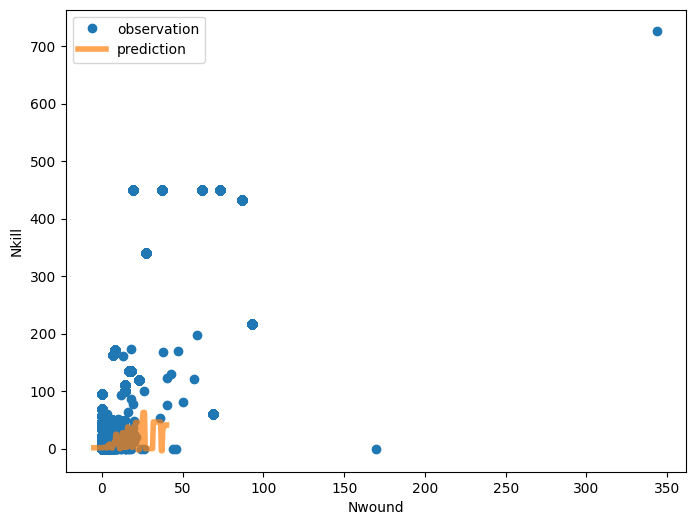

In [28]:
# 2.2 Model Plot
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(Terrorismo['Nkill'], Terrorismo['Nwound'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('Nwound')
plt.ylabel('Nkill')
plt.legend()
plt.show()

## Modelo con dos variables

In [24]:
#1.1 Model Parametrization 
# criterion: mse mean squared error, which is equal to variance reduction as feature selection criterion
#splitter: best/random
# max_depth: low value avoid overfitting
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)



In [29]:
#1.2 Model construction
regressor.fit(Terrorismo[['Nkill', 'Nwound']], Terrorismo['Longitude'])

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.



DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



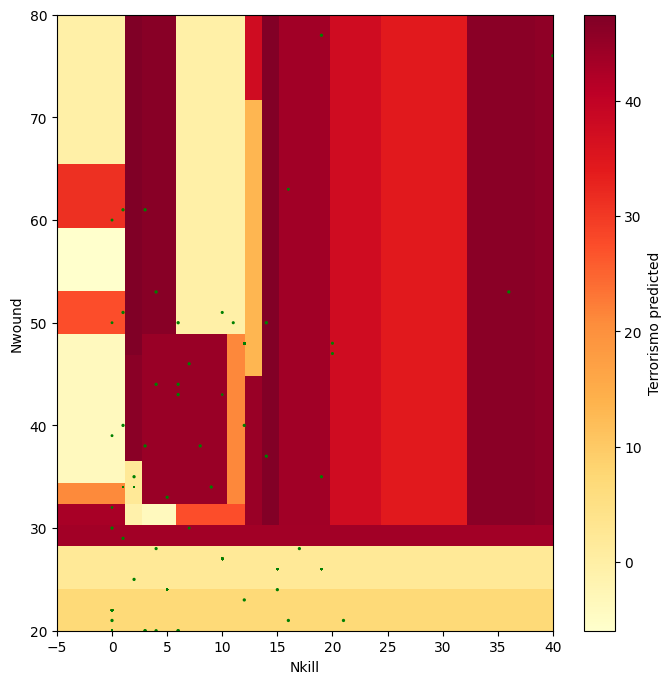

In [31]:
# This visualization is only useful for a model of two predictors

nx = 30
ny = 30
# creating a grid of points
x_Nkill = np.linspace(-5, 40, nx)
y_Nwound = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_Nkill, y_Nwound)
# evaluating the regresson on all the points
z_Terrorismo = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_Terrorismo, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_Nkill, y_Nwound, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='Terrorismo predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(Terrorismo['Nkill'], Terrorismo['Nwound'], s=Terrorismo['Longitude']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_Nkill), np.max(x_Nkill))
plt.ylim(np.min(y_Nwound), np.max(y_Nwound))
plt.xlabel('Nkill')
plt.ylabel('Nwound')
plt.show()


Vamos a construir el modelo con las tres variables y vamos a analizar posteriormente la importancia de las características según el árbol de decisión

In [33]:
#1.2 Model construction
regressor.fit(Terrorismo[['Nkill', 'Nwound', 'Success']], Terrorismo['Longitude'])

print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree': regressor.feature_importances_})

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.



Feature Relevances


,Attributes,Decision Tree
0,Nkill,0.260995
1,Nwound,0.304117
2,Longitude,0.434888


# Parametrización

 Antes de proceder a crear los modelos para predecir vamos a dividir nuestro conjunto de datos en dos partes una para entrenamiento (tuning) y otra para test.  

In [82]:
Terrorismo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414638 entries, 2000 to 2020
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Country      414638 non-null  object 
 1   City         414638 non-null  object 
 2   Latitude     414638 non-null  float64
 3   Longitude    414638 non-null  float64
 4   Multiple     414638 non-null  int64  
 5   Success      414638 non-null  int64  
 6   Attacktype   414638 non-null  object 
 7   Target_type  414638 non-null  object 
 8   Group        414638 non-null  object 
 9   Weapon_type  414638 non-null  object 
 10  Nkill        414638 non-null  int64  
 11  Nwound       414638 non-null  int64  
 12  unemployed   412656 non-null  float64
 13  Population   412656 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 63.6+ MB


In [109]:
target_col=['Latitude']

In [110]:
X = Terrorismo.drop(['Latitude'], axis=1)

y = Terrorismo['Latitude']

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [112]:
X_train.dtypes

Country         object
City            object
Longitude      float64
Multiple         int64
Success          int64
Attacktype      object
Target_type     object
Group           object
Weapon_type     object
Nkill            int64
Nwound           int64
unemployed     float64
Population     float64
dtype: object

In [113]:
from sklearn.tree import DecisionTreeClassifier

Primero vamos a probar  si nuestro rendimiento mejora aumentando la profundidad evaluando con el propio conjunto de entrenamiento

In [120]:
# Compute the max 
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train[['Nkill', 'Nwound']], y_train['unemployed'])
    pred_values = regressor.predict(X_train[['Nkill', 'Nwound']])
    maev = mean_absolute_error(y_train['unemployed'],pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

KeyError: ignored

Un árbol muy profundo aprenderá con muy poco error el valor del conjunto de entrenamiento. Pero el problema está en el sobreaprendizaje, es decir, aprenderemos muy en detalle las observaciones del conjunto de entrenamiento pero seremos muy poco flexibles ante nuevas circunstancias. 

Para evitar este sobreaprendizaje vamos a probar a realizar **evaluación cruzada**, es decir, evaluar las parametrizaciones ante diferentes subconjuntos de entrenamiento y de test.

In [125]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error

# reset index
X_train.reset_index(drop = True, inplace = True)
X_train.head()

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True, random_state=0) #

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(X_train):
      # División train test aleatoria
      f_train = y_train.loc[train_fold]
      f_test = X_train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['Success'], axis=1), 
                           y = f_train['Success'])
      y_pred = regressor.predict(X = f_test.drop(['Success'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['Success'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 



KeyError: ignored

In [101]:
total_scores

NameError: ignored

# Construcción y ejecución del modelo 



Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente 

In [102]:
# constructor
regressor = DecisionTreeRegressor(max_depth = max_depth)
# fit and predict

regressor.fit( X = train.drop(['Success'], axis=1), y = train['Success'])
y_pred = regressor.predict(X = test.drop(['Success'], axis = 1))
mae = mean_absolute_error(test['Success'], y_pred)
print ('MAE', mae)
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'date': test.index, 'result': res})



NameError: ignored

Y guardamos el fichero de resultados en nuestro disco.

In [ ]:
from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

In [103]:

from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['count'].shape[0]))
plt.plot(xx, test['count'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecissionTreeRegressor (depth = %i)" % max_depth)

plt.show()

KeyError: ignored

# Referencias

**Exploracion:**

https://machinelearningmastery.com/visualize‐machine‐learning‐data‐python‐pandas/

**Librería:**  
http://scikit‐learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**Problema y Código:**

https://cambridgespark.com/content/tutorials/getting‐started‐with‐regression‐and‐decision‐trees/index.html

https://cambridgespark.com/content/tutorials/from‐simple‐regression‐to‐multiple‐regression‐with‐decision‐trees/index.html